In [117]:
import pandas as pd
import numpy as np
import sklearn as sk
import requests
from bs4 import BeautifulSoup, Comment
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

pd.set_option('display.max_columns', None)

In [118]:
def get_data(url):
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))

    tables = []
    for each in comments:
        if 'table' in each:
            try:
                tables.append(pd.read_html(each)[0])
            except:
                continue

    players = tables[0]
    players.drop(players[players.Performance.Gls == "Gls"].index, inplace=True)

    tbls = pd.read_html(url)
    teams = tbls[0]
    teamsvs = tbls[1]
    #print("0 -> Player Data, 1 -> Team Data, 2 -> vs. Team Data")
    return ([players, teams, teamsvs])
    

#League Player Stats, Team Stats, vs. Team Stats


In [119]:
prem = get_data("https://fbref.com/en/comps/9/stats/Premier-League-Stats")
bundesliga = get_data("https://fbref.com/en/comps/20/stats/Bundesliga-Stats")
seriea = get_data("https://fbref.com/en/comps/11/stats/Serie-A-Stats")
ligue1 = get_data("https://fbref.com/en/comps/13/stats/Ligue-1-Stats")
laliga = get_data("https://fbref.com/en/comps/12/stats/La-Liga-Stats")

In [123]:
seriea[0].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     James Abankwah             ie IRL                 DF   
1                  2  Oliver Abildgaard             dk DEN                 MF   
2                  3      Tammy Abraham            eng ENG                 FW   
3                  4   Christian Acella             it ITA                 MF   
4                  5   Francesco Acerbi             it ITA                 DF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Playing Time  \
               Squad                Age               Born           MP   
0            Udinese                 18               2004            2   
1      Hellas Verona                 26               1996           13   
2               Roma                 24               1997           38   
3          Cremonese                 20               2002            1   
4              Inter                 34               1988           31   

                     Performance                                 Expected  \
  Starts   Min   90s         Gls Ast G+A G-PK PK PKatt CrdY CrdR       xG   
0      1    63   0.7           0   0   0    0  0     0    0    0      0.0   
1      6   592   6.6           0   0   0    0  0     0    2    0      0.1   
2     24  2189  24.3           8   3  11    8  0     0    2    0     10.8   
3      0    15   0.2           0   0   0    0  0     0    0    0      0.0   
4     25  2425  26.9           0   2   2    0  0     0    4    0      1.0   

                      Progression           Per 90 Minutes                    \
   npxG  xAG npxG+xAG        PrgC PrgP PrgR            Gls   Ast   G+A  G-PK   
0   0.0  0.0      0.0           0    0    0           0.00  0.00  0.00  0.00   
1   0.1  0.4      0.6           2   15    8           0.00  0.00  0.00  0.00   
2  10.8  3.6     14.5          35   54  141           0.33  0.12  0.45  0.33   
3   0.0  0.0      0.0           0    0    0           0.00  0.00  0.00  0.00   
4   1.0  1.1      2.1          39  100   32           0.00  0.07  0.07  0.00   

                                           Unnamed: 36_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
1   0.00  0.02  0.07   0.09  0.02     0.09             Matches  
2   0.45  0.45  0.15   0.60  0.45     0.60             Matches  
3   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
4   0.07  0.04  0.04   0.08  0.04     0.08             Matches

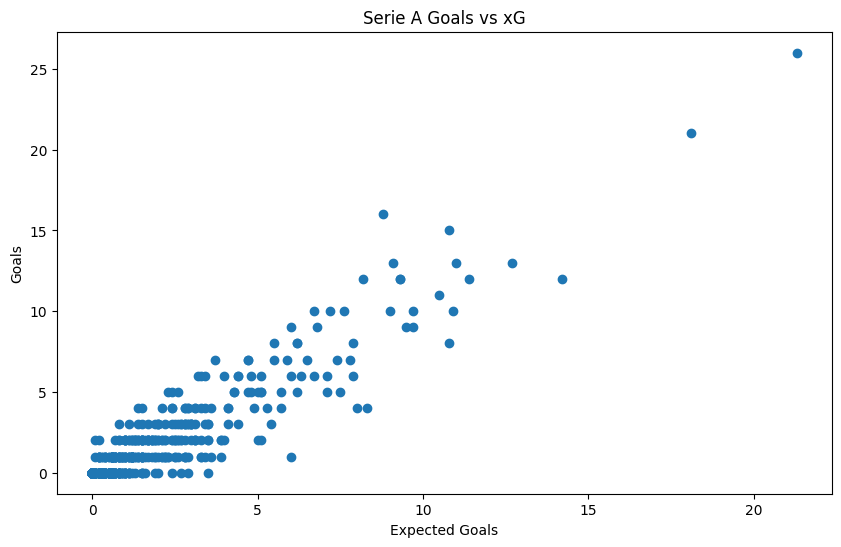

In [122]:
plt.scatter(seriea[0]['Expected']['xG'].astype(float), seriea[0]['Performance']['Gls'].astype(float))
plt.ylabel("Goals")
plt.xlabel("Expected Goals")
plt.title("Serie A Goals vs xG")
plt.show()